#### Welcome to Assingment  2 of Machine Learning Course 5DV194! 
The task is to develop regression algorithms to predict house prices.
#### Deadline of Assignment 2:
10 March, 2021 (23:59:59 Stockholm time)


#### Goal 
To practice linear regression and neural network on housing price prediction. Additionally, to get familiar with the libraries of pandas (e.g., data frame), tensorflow (e.g., sequential), sklearn (e.g., linear regression, ridge regression, preprocessing).
#### Dataset
The Boston Housing Dataset
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

 

#### Grading (200 points)
##### 160 points 
Follow this jupyter notebook file below, you will find some tasks to complete by coding.  
##### 40 points (report)
Write a report (1 page, Times New Roman, font 11) which should include comparision of both algorithms on different settings (30 points); And your thoughts/options about the difference of them (different algorithms, different settings, different performance). (10 points).     
 

Upload the report PDF and this jupyter notebook file "Assignment2_regression.ipynb" to Cambro/Drop Box.

## Import  some libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Task-1: import the library of 'numpy' and give it an alias as "np" (5 points)

In [2]:
import numpy as np

## Get the data

In [3]:
from sklearn.datasets import load_boston
housing_data = load_boston()

## Explore the data a bit

In [4]:
# Checing the keys of the dataset, which is in dictionary format.
print(housing_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
# Checking description of the dataset
print (housing_data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Converting the data into Data Frame using pandas
boston = pd.DataFrame(housing_data.data)
#Assigning feature-names to colums of data frame
boston.columns = housing_data.feature_names

#### Task-2: Print the first ten rows for the dataframe boston (5 points)

In [7]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [8]:
#Adding the target column Price to the data frame
boston['PRICE'] = housing_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Let's see how the data structure looks like now
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Task-3: Return the Summary Statistic of the numeric columns for dataframe boston by applying the method 'describe' of data frame. (5 points)

In [10]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Before going to machine learning algorithms, we should understand the data a  bit more.

<AxesSubplot:>

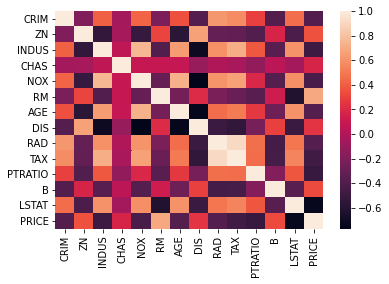

In [11]:
# Correlation between Different features
sns.heatmap(boston.corr())

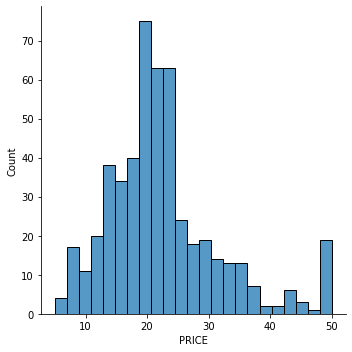

In [12]:
# Distributing of PRICE Column
sns.displot(boston['PRICE'])

#### Task-4: try yourself to distribute two other columns (e.g., number of rooms, nitric oxides concentration) (10 points)

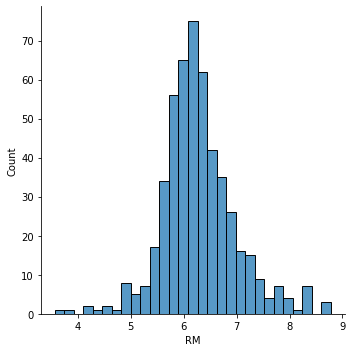

In [13]:
sns.displot(boston['RM'])

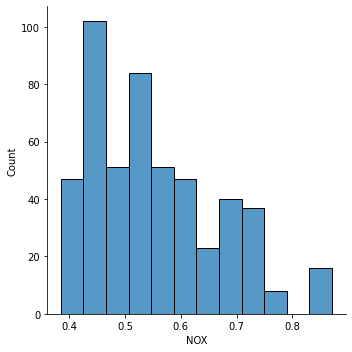

In [14]:
sns.displot(boston['NOX'])

#### Now, let's try machine learning regression models. 

## Algorithm1: Linear Regression

In [15]:
# Creating Predictor variable 'X' and Target Variable 'y'

# X contains all the features except for the target value Price
X = boston.drop('PRICE', axis = 1)
y = boston['PRICE']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Task-5: complete the following line of code which splits the data into training and test set: X_train contains 70% of total dataset, X_test contains 30% (10 points)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

# X_train contains 70% of total dataset
print(X_train.shape)
# X_test contains 30% of total dataset
print(X_test.shape)

(354, 13)
(152, 13)


In [18]:
lr = LinearRegression()

#### Task-6: fit the training dataset into linear regression model. (7.5 points)

In [19]:
#Train/fit the model to training data
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# print the intercept
print(lr.intercept_)

#Coefficients
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

43.93827728692847


,Coefficient
CRIM,-0.140653
ZN,0.054882
INDUS,0.018309
CHAS,3.431664
NOX,-20.869682
RM,2.806862
AGE,0.028180
DIS,-1.544571
RAD,0.327976
TAX,-0.009712


#### Task-7: complete the following line of codes which use the trained model above to predict the house prices on test dataset, and output the prediction result as "pred". (5 points)

In [21]:
pred = lr.predict(X_test)

Text(0, 0.5, 'Predicted prices')

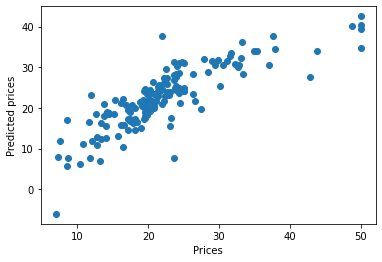

In [22]:
plt.scatter(y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

In [23]:
# evaluating and outputing the results using different evaluation metrics (i.e., MAE, MSE, RMSE).
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.408310785441626
MSE: 22.14514368830514
RMSE: 4.705862693311944


#### Task-8: Try Ridge or Lasso regressions  (set alpha=1.0) in the following steps. (20 points)

In [24]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

#step-1: Create a ridge or lasso regression model
ridge = Ridge(alpha = 1)

#step-2: Fit to our training data (i.e., X_train and y_train)
ridge.fit(X_train, y_train)

#step-3: Apply the model too predict on our testing data (i.e., X_test)
z = ridge.predict(X_test)

#step-4: Print prediction performance RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, z)))
print('MAE:', metrics.mean_absolute_error(y_test, z))
print('MSE:', metrics.mean_squared_error(y_test, z))


RMSE: 4.69598728655949
MAE: 3.365281120866957
MSE: 22.05229659552836


In [25]:
#step-1: Create a ridge or lasso regression model
lasso = Lasso(alpha = 1)

#step-2: Fit to our training data (i.e., X_train and y_train)
lasso.fit(X_train, y_train)

#step-3: Apply the model too predict on our testing data (i.e., X_test)
z = lasso.predict(X_test)

#step-4: Print prediction performance RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, z)))
print('MAE:', metrics.mean_absolute_error(y_test, z))
print('MSE:', metrics.mean_squared_error(y_test, z))



RMSE: 5.540285096183895
MAE: 3.9041161726900206
MSE: 30.6947589469974


#### Question: Is Ridge regression and Lasso regression linear regression?  What is differnece between Ridge and Lasso regressions? (7.5 points)

Ridge Regression and Lasso Regression are variants of Linear Regression. The differences are based on how they treat penalization during the regression. Another difference is that they should be used in different scenarios as dictated by the input data. There are datasets which would be more appropriate for each of these- linear, ridge and lasso. Another way to think of Ridge and Lasso are by introducing L1 or L2 penalties. These are introduced with the goal of preventing overfitting during the training of a model.

## Algorithm2: Neural Networks - Regression

In [26]:
X = boston.drop('PRICE', axis = 1)
Y = boston['PRICE']

In [27]:
from sklearn import preprocessing

#### Task-9: complete the following codes which apply the preprocessing method MinMaxScaler to scale the given training data X  and assign the scaled training data to variable X_scale. (10 points)

In [28]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

#### Task-10: complete the following codes which first split the training data into training and validation_test sets (e.g., 70/30), then split the validation_test set into validation and test (e.g.,50/50). (10 points)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test =  train_test_split(X_scale, y, train_size=.7)
X_val, X_test, Y_val, Y_test =  train_test_split(X_val_and_test, Y_val_and_test, train_size=.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(354, 13) (76, 13) (76, 13) (354,) (76,) (76,)


In [30]:
# import libraries of tensorflow to build neurral networks.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Task-11: complete the following codes which build a two layers neural network model by using Sequential. (10 points)
#### FYI: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

In [31]:
# Build model
model = Sequential([
    Dense(20,activation="relu", name="layer1"),
    Dense(1, name="output"),
])

#### Task-12: compile the model (use mean_squared_error as loss function, and apply metrics=['mse', 'mae', 'mape'])  (7.5 points)

In [32]:
# Compile model
model.compile(optimizer='sgd', loss='mse', metrics=["mse","mae","mape"])


#### Task-13: compelte the following codes which train/fit the model using the function of fit  (both training data and valiation data will be used)  (7.5 points)

In [33]:
hist =  model.fit(X_train, Y_train, epochs=20, validation_data = (X_val, Y_val))


Epoch 1/20
12/12 [==============================] - 1s 49ms/step - loss: 331.8539 - mse: 331.8539 - mae: 14.6128 - mape: 64.9792 - val_loss: 49.3930 - val_mse: 49.3930 - val_mae: 5.0866 - val_mape: 24.0076
Epoch 2/20
12/12 [==============================] - 0s 6ms/step - loss: 97.4525 - mse: 97.4525 - mae: 7.2706 - mape: 35.3679 - val_loss: 26.1437 - val_mse: 26.1437 - val_mae: 3.7405 - val_mape: 18.7852
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 53.8340 - mse: 53.8340 - mae: 5.2585 - mape: 24.3307 - val_loss: 35.6007 - val_mse: 35.6007 - val_mae: 4.2922 - val_mape: 19.4763
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 90.2578 - mse: 90.2578 - mae: 7.1551 - mape: 31.5914 - val_loss: 75.4224 - val_mse: 75.4224 - val_mae: 8.0254 - val_mape: 42.2549
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 59.2983 - mse: 59.2983 - mae: 5.8287 - mape: 27.1077 - val_loss: 48.7260 - val_mse: 48.7260 - val_mae: 6.2242 - val_

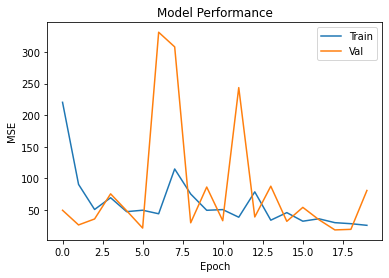

In [34]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Model Performance')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Task-14: evaluate the model on X_test and Y_test by applying the method 'evaluate'  (5 points)

In [35]:
# Evaluation
print(dict(zip(model.metrics_names, model.evaluate(X_test, Y_test))))

3/3 [==============================] - 0s 2ms/step - loss: 96.0818 - mse: 96.0818 - mae: 8.8316 - mape: 40.7104
{'loss': 96.08180236816406, 'mse': 96.08180236816406, 'mae': 8.831637382507324, 'mape': 40.71036148071289}


#### NON-mandatory task: if you have time/interest, you can visualize the prediction result and labels using scatter.

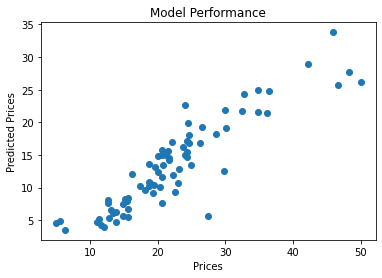

In [36]:
plt.scatter(Y_test,model.predict(X_test))
plt.title('Model Performance')
plt.ylabel('Predicted Prices')
plt.xlabel('Prices')
plt.show()

#### Task-15:  complete the following codes to build the second neural network model with one more layer, compile, train, and evaluate the model.  (15 points)

In [37]:
# step-1: Build the second model with different settings
model_2 = Sequential([
    Dense(10, activation="relu", name="layer1"),
    Dense(4, activation="relu", name="layer2"),
    Dense(1, name="output"),
])

# step-2: Compile model
model_2.compile(optimizer='sgd', loss='mse', metrics=["mse","mae","mape"])

# step-3: Train/Fit the model
hist_2 =  model_2.fit(X_train, Y_train, epochs=50, validation_data = (X_val, Y_val))

# step-4: Evaluation
print(dict(zip(model_2.metrics_names, model_2.evaluate(X_test, Y_test))))


Epoch 1/50
12/12 [==============================] - 1s 37ms/step - loss: 499.0663 - mse: 499.0663 - mae: 20.0720 - mape: 90.3523 - val_loss: 362.4994 - val_mse: 362.4994 - val_mae: 17.5610 - val_mape: 78.9401
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 408.6703 - mse: 408.6703 - mae: 17.6379 - mape: 73.2796 - val_loss: 237.9890 - val_mse: 237.9890 - val_mae: 13.5873 - val_mape: 58.4191
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 302.7589 - mse: 302.7589 - mae: 14.4324 - mape: 56.1627 - val_loss: 159.1038 - val_mse: 159.1038 - val_mae: 10.4787 - val_mape: 43.5155
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 230.3968 - mse: 230.3968 - mae: 11.7451 - mape: 44.7132 - val_loss: 115.1324 - val_mse: 115.1324 - val_mae: 8.4977 - val_mape: 35.3121
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 153.8496 - mse: 153.8496 - mae: 9.2674 - mape: 36.4980 - val_loss: 89.3311 - val_mse: 89.3311 - 

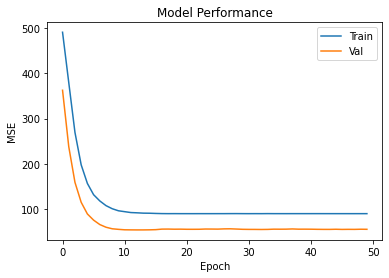

In [38]:
plt.plot(hist_2.history['mse'])
plt.plot(hist_2.history['val_mse'])
plt.title('Model Performance')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [39]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

#### Task-16:  complete the following codes (steps1 - step4) to build the third neural network with different settings (try regularizer parameter and dropout), compile, train, evaluate, and predict as above.  (20 points)

In [40]:
# step-1: Build model 
model_3 = Sequential([
    Dense(10, activation="relu", kernel_regularizer='l2', name="layer1"),
    Dropout(.2),
    Dense(20, activation="relu", kernel_regularizer='l2', name="layer3"),
    Dropout(.1),
    Dense(2, activation="relu", kernel_regularizer='l2', name="layer5"),
    Dropout(.1),
    Dense(1, name="output"),
])

# step-2: Compile model
model_3.compile(optimizer='sgd', loss='mse', metrics=["mse","mae","mape"])

# step-3: Train/Fit the model
hist_3 = model_3.fit(X_test, Y_test, epochs=60, validation_data=(X_val,Y_val))

# step-4: Evalution
print(dict(zip(model_3.metrics_names, model_3.evaluate(X_test, Y_test))))

Epoch 1/60
3/3 [==============================] - 1s 133ms/step - loss: 880.8079 - mse: 880.5023 - mae: 23.3418 - mape: 107.9816 - val_loss: 587.9715 - val_mse: 537.0627 - val_mae: 21.9761 - val_mape: 102.0139
Epoch 2/60
3/3 [==============================] - 0s 30ms/step - loss: 631.5166 - mse: 580.6179 - mae: 22.1092 - mape: 101.1391 - val_loss: 530.0070 - val_mse: 479.1593 - val_mae: 20.6167 - val_mape: 94.9093
Epoch 3/60
3/3 [==============================] - 0s 28ms/step - loss: 547.9345 - mse: 497.0968 - mae: 20.4714 - mape: 93.5227 - val_loss: 477.5711 - val_mse: 426.7844 - val_mae: 19.3047 - val_mape: 88.0530
Epoch 4/60
3/3 [==============================] - 0s 28ms/step - loss: 537.3620 - mse: 486.5853 - mae: 19.8942 - mape: 86.3293 - val_loss: 432.8923 - val_mse: 382.1665 - val_mae: 18.1123 - val_mape: 81.8212
Epoch 5/60
3/3 [==============================] - 0s 27ms/step - loss: 499.3920 - mse: 448.6762 - mae: 18.9114 - mape: 80.0158 - val_loss: 394.3693 - val_mse: 343.7043 

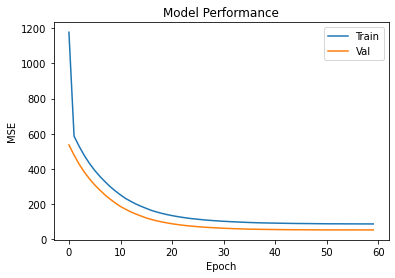

In [41]:
plt.plot(hist_3.history['mse'])
plt.plot(hist_3.history['val_mse'])
plt.title('Model Performance')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Congratualtions if you ran through above!  